In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

## Basic Lightgbm

In [27]:
df = pd.read_excel("C:\\Users\\s\\Desktop\\Dersler\\Data Informatics\\DI502\\Github\\Electricity_Consmption_EPIAS_data.xlsx")

dates_dt = pd.to_datetime(df.Tarih, format='%d.%m.%Y')
    
df.Tarih = dates_dt.copy()
df = df.sort_values("Tarih")

In [28]:
df['year']=df['Tarih'].dt.year 
df['month']=df['Tarih'].dt.month
df['day']=df['Tarih'].dt.day
df['season']=df['Tarih'].dt.quarter
df['week']=df['Tarih'].dt.isocalendar().week
df['dayofweek']=df['Tarih'].dt.dayofweek
df['hour']= df.Saat.astype("str").apply(lambda x: x[:2]).astype("int")

df = df.sort_values(["year","month","day","hour"])

target = "Tüketim Miktarı (MWh)"

df[target] =  pd.Series([item.replace(".", "").replace(",",".") for item in df.loc[:,target]]).astype("float64")

In [25]:
train = df[df.Tarih <= "2023-09-30"].reset_index(drop=True).copy()
test = df[df.Tarih > "2023-09-30"].reset_index(drop=True).copy()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 17520, number of used features: 7
[LightGBM] [Info] Start training from score 37127.426340
r2: 0.9414566883958938 rmse: 1083.1564971705934


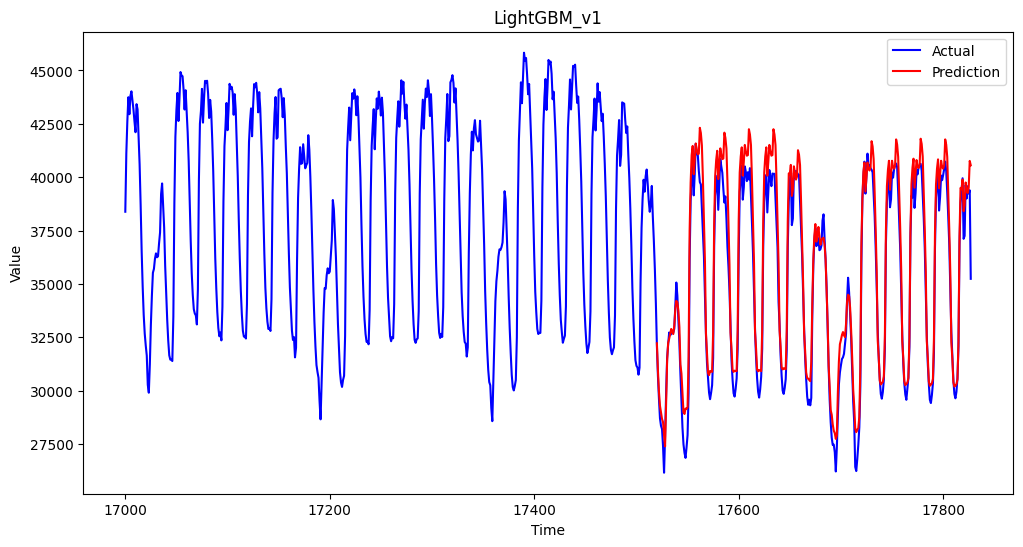

In [26]:
x_train = train.iloc[:,-7:]
x_test = test.iloc[:,-7:]
y_train = train.loc[:,target]
y_test = test.loc[:,target]

eval_set = [(x_test,y_test)]
basic_model = LGBMRegressor(random_state=42,verbose=1)
basic_model.fit(x_train, y_train,eval_set=eval_set)

y_predicted = pd.Series(basic_model.predict(x_test))
rmse = mean_squared_error(y_test, y_predicted, squared=False)
r2 = r2_score(y_test, y_predicted)
print("r2:",r2, "rmse:", rmse)

y_predicted.index = range(17520,17828)

plt.figure(figsize=(12, 6))
plt.plot(df.loc[17000:,"Tüketim Miktarı (MWh)"], label='Actual', color='blue')
plt.plot(y_predicted, label='Prediction', color='red',)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LightGBM_v1')
plt.legend()
plt.show()